## ARIMA MODEL

In this notebook I am exploring the data and some of the items sold in the store, and attempting to fit a time series ARIMA model to one of the items sold. Specifically, I chose ice as an item, expecting to see more seasonal data as people would be more inclined to buy it in the summer. 

I attempted to predict the last 10 days of of the data in regards to the dollars' worth of ice that the store sold.

Unfortunately, since the data is only 13 months old, the model could not grasp seasonal trends eg. every summer more people buy ice. Although it did not make good predictions on a daily basis, regarding how much ice would be sold every one of the last 10 days, overall it did pretty well since around 280 dollars worth of ice was sold in the last 10 days and the model predicted about 290. 

Next steps will be to maybe try out some other items with this model and then soon move on to a recurrent neural network which should be able to yield better results.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#import data
dat = pd.read_csv("./data/sales.csv")
dat2 = pd.read_csv("./data/events.csv")
dat3 = pd.read_csv("./data/weather.csv")

In [4]:
#format Date so that it does not contain hours and set it as index
dat['Date'] = dat['Date'].str[:10]
dat.set_index('Date')

dat3['date'] = dat3['date'].str[:10]
dat3.set_index('date')

print(dat3.shape)

(405, 4)


In [5]:
dat2

date     event
0   2016-11-06  Football
1   2016-12-04  Football
2   2016-12-11  Football
3   2016-12-24  Football
4   2017-01-08  Football
5   2017-08-10  Football
6   2017-08-31  Football
7   2017-09-10  Football
8   2017-09-24  Football
9   2017-09-28  Football
10  2017-10-22  Football
11  2017-11-06  Football
12  2017-11-19  Football
13  2017-12-03  Football

In [6]:
dat

Date      POSCode           Description  SalesQuantity  \
0       2017-11-30          410           DONUT $1.29           24.0   
1       2017-11-30          621                BANANA            1.0   
2       2017-11-30          972        COFF/TEA 16 OZ            6.0   
3       2017-11-30          973        COFF/TEA 20 OZ           12.0   
4       2017-11-30          974        COFF/TEA 24 OZ            7.0   
5       2017-11-30          988    MUG REFILL REGULAR            3.0   
6       2017-11-30          989          MUG REFIL BB            5.0   
7       2017-11-30         1375                BB MUG            1.0   
8       2017-11-30         1602              GB PRESS            9.0   
9       2017-11-30         1607         JOURNAL DAILY            3.0   
10      2017-11-30         1700         VB PUPPY CHOW            4.0   
11      2017-11-30         1902            MEGA BUCKS          156.0   
12      2017-11-30         2050                   SRD            7.0   
13      2017-11-30         2051                SILVER            5.0   
14      2017-11-30         2052                  GOLD            3.0   
15      2017-11-30         2053              PLATINUM            2.0   
16      2017-11-30         2508         SALMONS STICK            1.0   
17      2017-11-30         2612  EMPLOYEE FREE BANANA           -1.0   
18      2017-11-30         9009   RENARD HOT WING CHS            1.0   
19      2017-11-30    842142236         TY TEENY POOP            1.0   
20      2017-11-30    866000002  ZIG ZAG FRENCH (ORAN            1.0   
21      2017-11-30    866000004  ZIG ZAG THIN K C WHI            1.0   
22      2017-11-30    980000760  TIC TAC BIG PK FRUIT            1.0   
23      2017-11-30    980000761  TIC TAC BIG PK SNGLS            1.0   
24      2017-11-30   1070006080              ST HEATH            1.0   
25      2017-11-30   1100000288     EAGLE 20S RED BOX            2.0   
26      2017-11-30   1100000406  PYRAMID BLUE BOX 100            1.0   
27      2017-11-30   1100000409  PYRAMID MENTHOL GOLD            1.0   
28      2017-11-30   1100000492       PYRAMID RED BOX            1.0   
29      2017-11-30   1100000493      PYRAMID BLUE BOX            1.0   
...            ...          ...                   ...            ...   
166630  2016-11-01  76306170804    DOUBLE CAR CHARGER            1.0   
166631  2016-11-01  78616200151     SMART WATER 700ML            1.0   
166632  2016-11-01  78616208000   VIT WTR ENERGY 20OZ            1.0   
166633  2016-11-01  78616233800   SMART WATER 33 8 OZ            1.0   
166634  2016-11-01  78913191894          JDRF SNEAKER           26.0   
166635  2016-11-01  79255470103        LIL CLEAR EYES            1.0   
166636  2016-11-01  81515402000         NOS ORIG 16OZ            1.0   
166637  2016-11-01  81515402011      NOS CRY OUT 16OZ            1.0   
166638  2016-11-01  81534802333          $2.50 FLOWER            1.0   
166639  2016-11-01  81809400300       RCKSTAR PUNCHED            4.0   
166640  2016-11-01  81809400390  RCKSTAR FRZ FROZ LIM            2.0   
166641  2016-11-01  81809400415  RCKSTAR FRZ PINA COL            2.0   
166642  2016-11-01  81809400417  RCK STAR WHIP STRAWB            2.0   
166643  2016-11-01  83514301097  ITOEN TEA GREEN UNSW            1.0   
166644  2016-11-01  83514301099   ITOEN TEA BLK UNSWT            1.0   
166645  2016-11-01  85512900015  CITY SHADES SUNGLASS            1.0   
166646  2016-11-01  85808700020          ICE 20LB BAG            2.0   
166647  2016-11-01  85916000500  TITLE TWN BREW 6PK D            1.0   
166648  2016-11-01  86222100007   BADGER BREW 6/4 BUN            1.0   
166649  2016-11-01  88399025000  GOOD2GROW FRUIT PUNC            1.0   
166650  2016-11-01  88462310040  BEAR NKD ENRG BAR PB            1.0   
166651  2016-11-01  88810901005   HOST ZINGERS DEVILS            1.0   
166652  2016-11-01  88810901006            HOST HO HO            1.0   
166653  2016-11-01  88810901010         HOST TWINKIES 

In [7]:
dat.Description.unique()

array(['DONUT $1.29', 'BANANA', 'COFF/TEA 16 OZ', ...,
       'FRITO NUT HARV PRO P', 'GRIZZ LC STRAIGHT PP',
       'BELG BOY CHOCO STIX'], dtype=object)

In [8]:
#items sold the most days
dat['Description'].value_counts().max

<bound method Series.max of SWISHER SWT CIGRLO S    440
MARL GOLD               395
MEGA BUCKS              395
DEW  20OZ               395
COFF/TEA 16 OZ          394
COFF/TEA 24 OZ          394
COFF/TEA 20 OZ          393
MON REGULAR 16OZ        392
MARL FF                 386
RED BULL 12OZ           386
GRIZZLY LC WINTERGRE    386
DT COKE 20OZ            382
NEWP NON MEN 100        381
COKE 20OZ               380
DT DEW 20OZ             380
NEWP MEN                376
NEWP MEN 100            362
CAMEL MEN SILVER        358
PEPSI  20OZ             358
MELLO YELLO 20OZ        356
MON GREEN XXL           354
MARL SILVER             345
GB PRESS                344
DEW CAN                 343
BIC MINI LIGHTER        342
ICE 7LB BAG             341
MON ZERO ULT 16OZ       339
RED BULL 8 3OZ          338
JOURNAL DAILY           338
MUG REFILL REGULAR      337
                       ... 
LIL A SCREWDRIVER 2I      1
FULL THROTTLE DEAMON      1
WINE BTL CHS              1
TY DOG BARKS $5.99  

In [9]:
#drop information that is not needed
df = dat.drop(['POSCode', 'SalesAmount'], axis = 1)

In [32]:
# bananas = df.loc[df['Description'] == 'BANANA']
# bananas = bananas.drop(['Description'], axis = 1)
# bananas

# smartwater = df.loc[df['Description'] == 'SMART WATER 700ML']
# smartwater = smartwater.drop(['Description'], axis = 1)
# smartwater
#---------------------------------------------------------


#In the future the item in question will be passed in instead of hard coded.

item = df.loc[df['Description'] == 'DEW  20OZ']
item = item.drop(['Description'], axis = 1)

#Convert the date to proper datetime format
item['Date'] = pd.to_datetime(item['Date'],format='%Y-%m-%d')

#add days of the week
item['weekday'] = item['Date'].dt.dayofweek
# print(item)

#flip dataframe upside down
item = item.iloc[::-1]
#one hot encode days
item= pd.get_dummies(item, columns=['weekday'], prefix=['weekday'])

# print(item)
item = item.set_index('Date')
# item.index

print(item)

            SalesQuantity  weekday_0  weekday_1  weekday_2  weekday_3  \
Date                                                                    
2016-11-01           15.0          0          1          0          0   
2016-11-02           15.0          0          0          1          0   
2016-11-03           14.0          0          0          0          1   
2016-11-04           18.0          0          0          0          0   
2016-11-05           12.0          0          0          0          0   
2016-11-06           13.0          0          0          0          0   
2016-11-07           29.0          1          0          0          0   
2016-11-08           14.0          0          1          0          0   
2016-11-09           11.0          0          0          1          0   
2016-11-10            9.0          0          0          0          1   
2016-11-11           22.0          0          0          0          0   
2016-11-12           25.0          0          0    

In [33]:
#convert football games to datetime format
dat2['Date'] = pd.to_datetime(dat2['date'],format='%Y-%m-%d')
dat2 = dat2.set_index('Date')
events = dat2.drop(['date'], axis = 1)

#concatenate with football events
result = pd.concat([item, events], axis=1, ignore_index=True)


In [34]:
#change NA values to 0.
result = result.fillna(0)
np.mean(result[0])



11.795454545454545

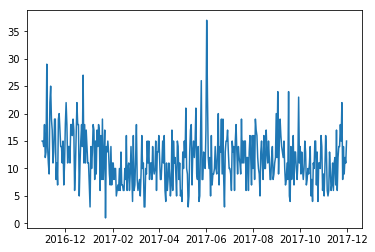

In [35]:

#plot ice sales
plt.plot(item['SalesQuantity'])
# plt.set_xticklabels(item['Date'], rotation=0)

In [135]:
#this dickey fuller test checks stationarity of the time series in order to fit an ARIMA model
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


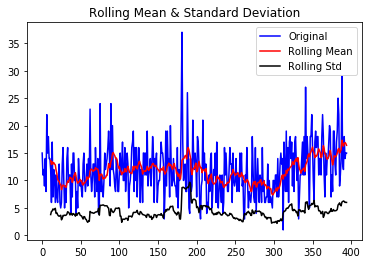

Results of Dickey-Fuller Test:
Test Statistic                  -2.308379
p-value                          0.169280
#Lags Used                      14.000000
Number of Observations Used    380.000000
Critical Value (1%)             -3.447676
Critical Value (5%)             -2.869176
Critical Value (10%)            -2.570838
dtype: float64


In [156]:
#Run test
item
item_values = item['SalesQuantity'].values
test_stationarity(item_values)

## ARIMA

In [158]:


#split into training and testing
X = item_values
forecast_length = 10
train_size = len(X) - forecast_length
train, test = X[0:train_size], X[train_size:]
test


array([ 9., 11., 14., 29., 13., 12., 18., 14., 15., 15.])

In [159]:
#find the best 
def arimaGridSearch(dataset, p_values, d_values, q_values):
    bestrmse = 100
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit()
                    predict = model_fit.forecast(steps=forecast_length)[0]
                    rmse = np.sqrt(mean_squared_error(test, predict))
                    print(order, " ", rmse)
                    if rmse < bestrmse:
                        bestrmse = rmse
                        bestorder = order
                except:
                    continue
    print("Best Overall: ", bestorder, bestrmse)
    return bestorder

In [161]:
#find best model for predictions
warnings.filterwarnings("ignore")
bestorder = arimaGridSearch(item_values,[1,2,3,4,5],[0,1,2,3],[0,1,2,3,4,5])

(1, 0, 0)   6.252763968563074
(1, 0, 1)   5.2433064548745705
(1, 0, 2)   5.300991772316194
(1, 1, 0)   9.671477383877736
(1, 1, 1)   5.330337503128879
(1, 1, 2)   5.33101819112737
(1, 1, 3)   5.4174132678995495
(1, 1, 4)   5.291322241089194
(1, 2, 0)   13.005368196945463
(2, 0, 0)   6.289464721755445
(2, 0, 1)   6.29280786670209
(2, 1, 0)   9.261640703845728
(2, 1, 1)   5.332567997410366
(2, 1, 2)   5.428401030090323
(2, 1, 3)   5.421375541351745
(2, 2, 0)   18.549173202341617
(3, 0, 0)   6.290712933183336
(3, 0, 1)   6.355141796301832
(3, 0, 2)   5.4090541564651735
(3, 0, 3)   5.264165001273471
(3, 0, 4)   5.678325566128659
(3, 1, 0)   8.593929511467685
(3, 1, 1)   5.2263898875672465
(3, 1, 2)   5.407558649428142
(3, 1, 4)   5.953369487565724
(3, 2, 0)   23.836989165181265
(4, 0, 0)   6.188767484044533
(4, 0, 2)   5.383017065393536
(4, 0, 3)   5.231192219845822
(4, 0, 4)   5.222448151282364
(4, 1, 0)   7.6108723121134165
(4, 1, 1)   5.283629943166209
(4, 1, 2)   5.344217741789551
(4, 

0    14.891138
1    15.294604
2    14.373701
3    15.141760
4    14.481074
5    14.827970
6    14.655729
7    14.478766
8    14.829532
9    14.177120
dtype: float64
5.173491618473824


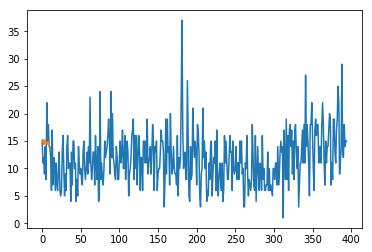

In [164]:
#(1,1,0) Seems to be the best prediction overall
model = ARIMA(train, bestorder)
model_fit = model.fit()

predict = model_fit.forecast(steps=forecast_length)[0]

# compute the error
rmse = np.sqrt(mean_squared_error(test, predict))

# plot the actual data plus forecast
predicted = pd.Series(predict)
print(predicted)
# ice_values.plot()
plt.plot(item_values)
# predicted.plot(color="red")
plt.plot(predicted)

print(rmse)

## MACHINE LEARNING

In [36]:


item.shape

X = item.values

# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaled_X = scaler.fit_transform(X)
X


array([[15.,  0.,  1., ...,  0.,  0.,  0.],
       [15.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [12.,  0.,  1., ...,  0.,  0.,  0.],
       [11.,  0.,  0., ...,  0.,  0.,  0.],
       [15.,  0.,  0., ...,  0.,  0.,  0.]])

In [39]:
#Function that turns the time series into a supervised problem

def make_supervised(item):
    df = DataFrame(item)
    
#     columns = [df.shift(i) for i in range(1,2)]
    columns = [df.shift(i) for i in range(1,2)]
    columns.append(df)
    
    df = concat(columns,axis=1)
    
    df.fillna(0, inplace=True)
    print(df)
    return(df)

item = make_supervised(X)

        0    1    2    3    4    5    6    7     0    1    2    3    4    5  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  15.0  0.0  1.0  0.0  0.0  0.0   
1    15.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  15.0  0.0  0.0  1.0  0.0  0.0   
2    15.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  14.0  0.0  0.0  0.0  1.0  0.0   
3    14.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  18.0  0.0  0.0  0.0  0.0  1.0   
4    18.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  12.0  0.0  0.0  0.0  0.0  0.0   
5    12.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  13.0  0.0  0.0  0.0  0.0  0.0   
6    13.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  29.0  1.0  0.0  0.0  0.0  0.0   
7    29.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  14.0  0.0  1.0  0.0  0.0  0.0   
8    14.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  11.0  0.0  0.0  1.0  0.0  0.0   
9    11.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   9.0  0.0  0.0  0.0  1.0  0.0   
10    9.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  22.0  0.0  0.0  0.0  0.0  1.0   
11   22.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  25.0  

In [53]:

X = item.iloc[:,0:8]
y = item.iloc[:,8]

y
# print(X)

0      15.0
1      15.0
2      14.0
3      18.0
4      12.0
5      13.0
6      29.0
7      14.0
8      11.0
9       9.0
10     22.0
11     25.0
12     19.0
13     17.0
14     11.0
15     13.0
16     19.0
17     19.0
18      8.0
19     11.0
20      7.0
21     19.0
22     20.0
23     17.0
24     14.0
25     14.0
26     11.0
27     15.0
28      7.0
29     11.0
       ... 
365     5.0
366    10.0
367    16.0
368    13.0
369     6.0
370     5.0
371     6.0
372    13.0
373    10.0
374     6.0
375     7.0
376    11.0
377     6.0
378    11.0
379    12.0
380     7.0
381    17.0
382     6.0
383    12.0
384    14.0
385    14.0
386    18.0
387    15.0
388    22.0
389     8.0
390    14.0
391     9.0
392    12.0
393    11.0
394    15.0
Name: 0, Length: 395, dtype: float64

In [57]:
#Break into training and testing data

X_train = X[:385]
# X_train = X_train.reshape(-1, 1)
print(X_train.shape)
X_test = X[385:]
print(X_test.shape)

# X_test = X_test.reshape(-1, 1)


# X_test
y_train = y[:385]
y_test = y[385:]


(385, 8)
(10, 8)


In [58]:
from sklearn import linear_model
from sklearn import svm

#ridge regression
clf1 = linear_model.Ridge(alpha=2)  
clf1.fit(X_train,y_train)

#suppor vector machine regression
clf2 = svm.SVR()
clf2.fit(X_train,y_train)

predicts_rrg = clf1.predict(X_test)
predicts_svm = clf2.predict(X_test)



In [59]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(predicts_rrg,y_test)))
print(np.sqrt(mean_squared_error(predicts_svm,y_test)))

4.35362099596381
4.508505203019309


## AVERAGE LAST 10 DAYS

In [65]:
last10 = X.loc[370:380,0]
print(last10)
average = np.mean(last10)

predicts_avg = [average]*10
np.sqrt(mean_squared_error(predicts_avg,y_test))

370     6.0
371     5.0
372     6.0
373    13.0
374    10.0
375     6.0
376     7.0
377    11.0
378     6.0
379    11.0
380    12.0
Name: 0, dtype: float64


6.643333824031474